### EDA of Airbus Ship dataset. datafor this competition you can find [here](https://www.kaggle.com/competitions/airbus-ship-detection/data). In this notebook we will take a look on data and general problem of the data.



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from pathlib import Path
import os
from tensorflow.keras.utils import load_img


# Load Dataframe and images

Note: You need to download arhive of images on your local machine to be able to run this notebook.

In [51]:
seg_df = pd.read_csv('../train_ship_segmentations_v2/train_ship_segmentations_v2.csv')

files = os.listdir('../dataset_folder')

In [56]:
files[:5]

['00003e153.jpg',
 '0001124c7.jpg',
 '000155de5.jpg',
 '000194a2d.jpg',
 '0001b1832.jpg']

## In dataframe (train_ship_segmentations_v2.csv) we have 2 columns:
* ImageId: name of the image
* EncodedPixels: Nan or Encoded pixels of ships

 So, first of all, we need to check images 

In [57]:
seg_df

ImageId                                      EncodedPixels  \
0       00003e153.jpg                                                NaN   
1       0001124c7.jpg                                                NaN   
2       000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...   
3       000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...   
4       000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...   
...               ...                                                ...   
231718  fffedbb6b.jpg                                                NaN   
231719  ffff2aa57.jpg                                                NaN   
231720  ffff6e525.jpg                                                NaN   
231721  ffffc50b4.jpg                                                NaN   
231722  ffffe97f3.jpg                                                NaN   

        ships  
0           0  
1           0  
2           1  
3           1  
4           1  
...       ...  
231718      0  
231719      0  
231720      0  
231721      0  
231722      0  

[231723 rows x 3 columns]

# Display 25 images with ships

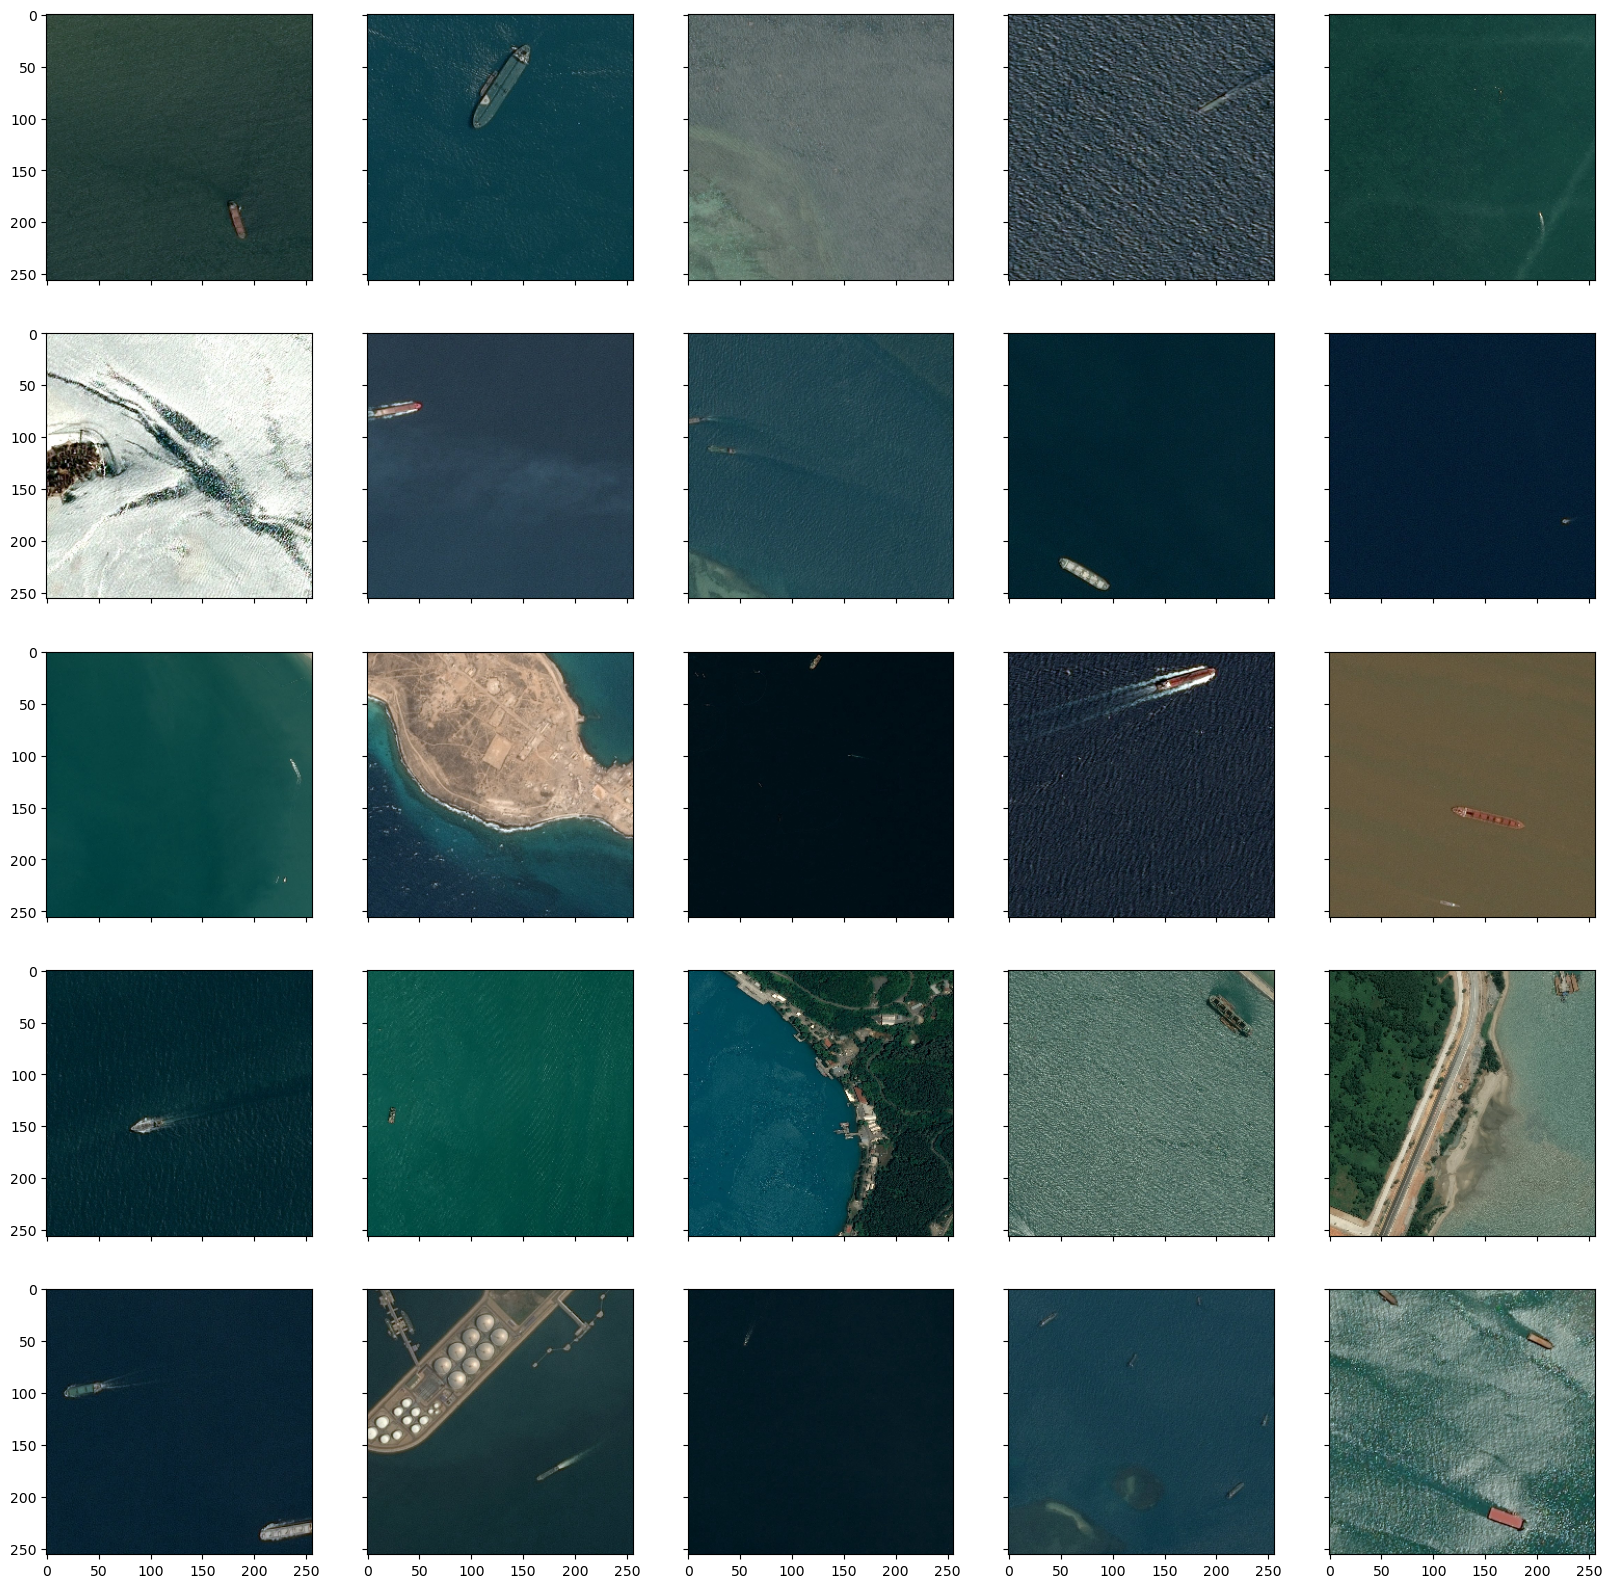

In [54]:
sample = seg_df[~seg_df.EncodedPixels.isna()].sample(25)

fig, ax = plt.subplots(5, 5, sharex='col', sharey='row')
fig.set_size_inches(20, 20)

for i, imgid in enumerate(sample.ImageId):
    col = i % 5
    row = i // 5
    
    path = '../dataset_folder/{}'.format(imgid)
    img = load_img(path, target_size = (256,256))
    
    ax[row, col].imshow(img)

# Display 25 images without ships


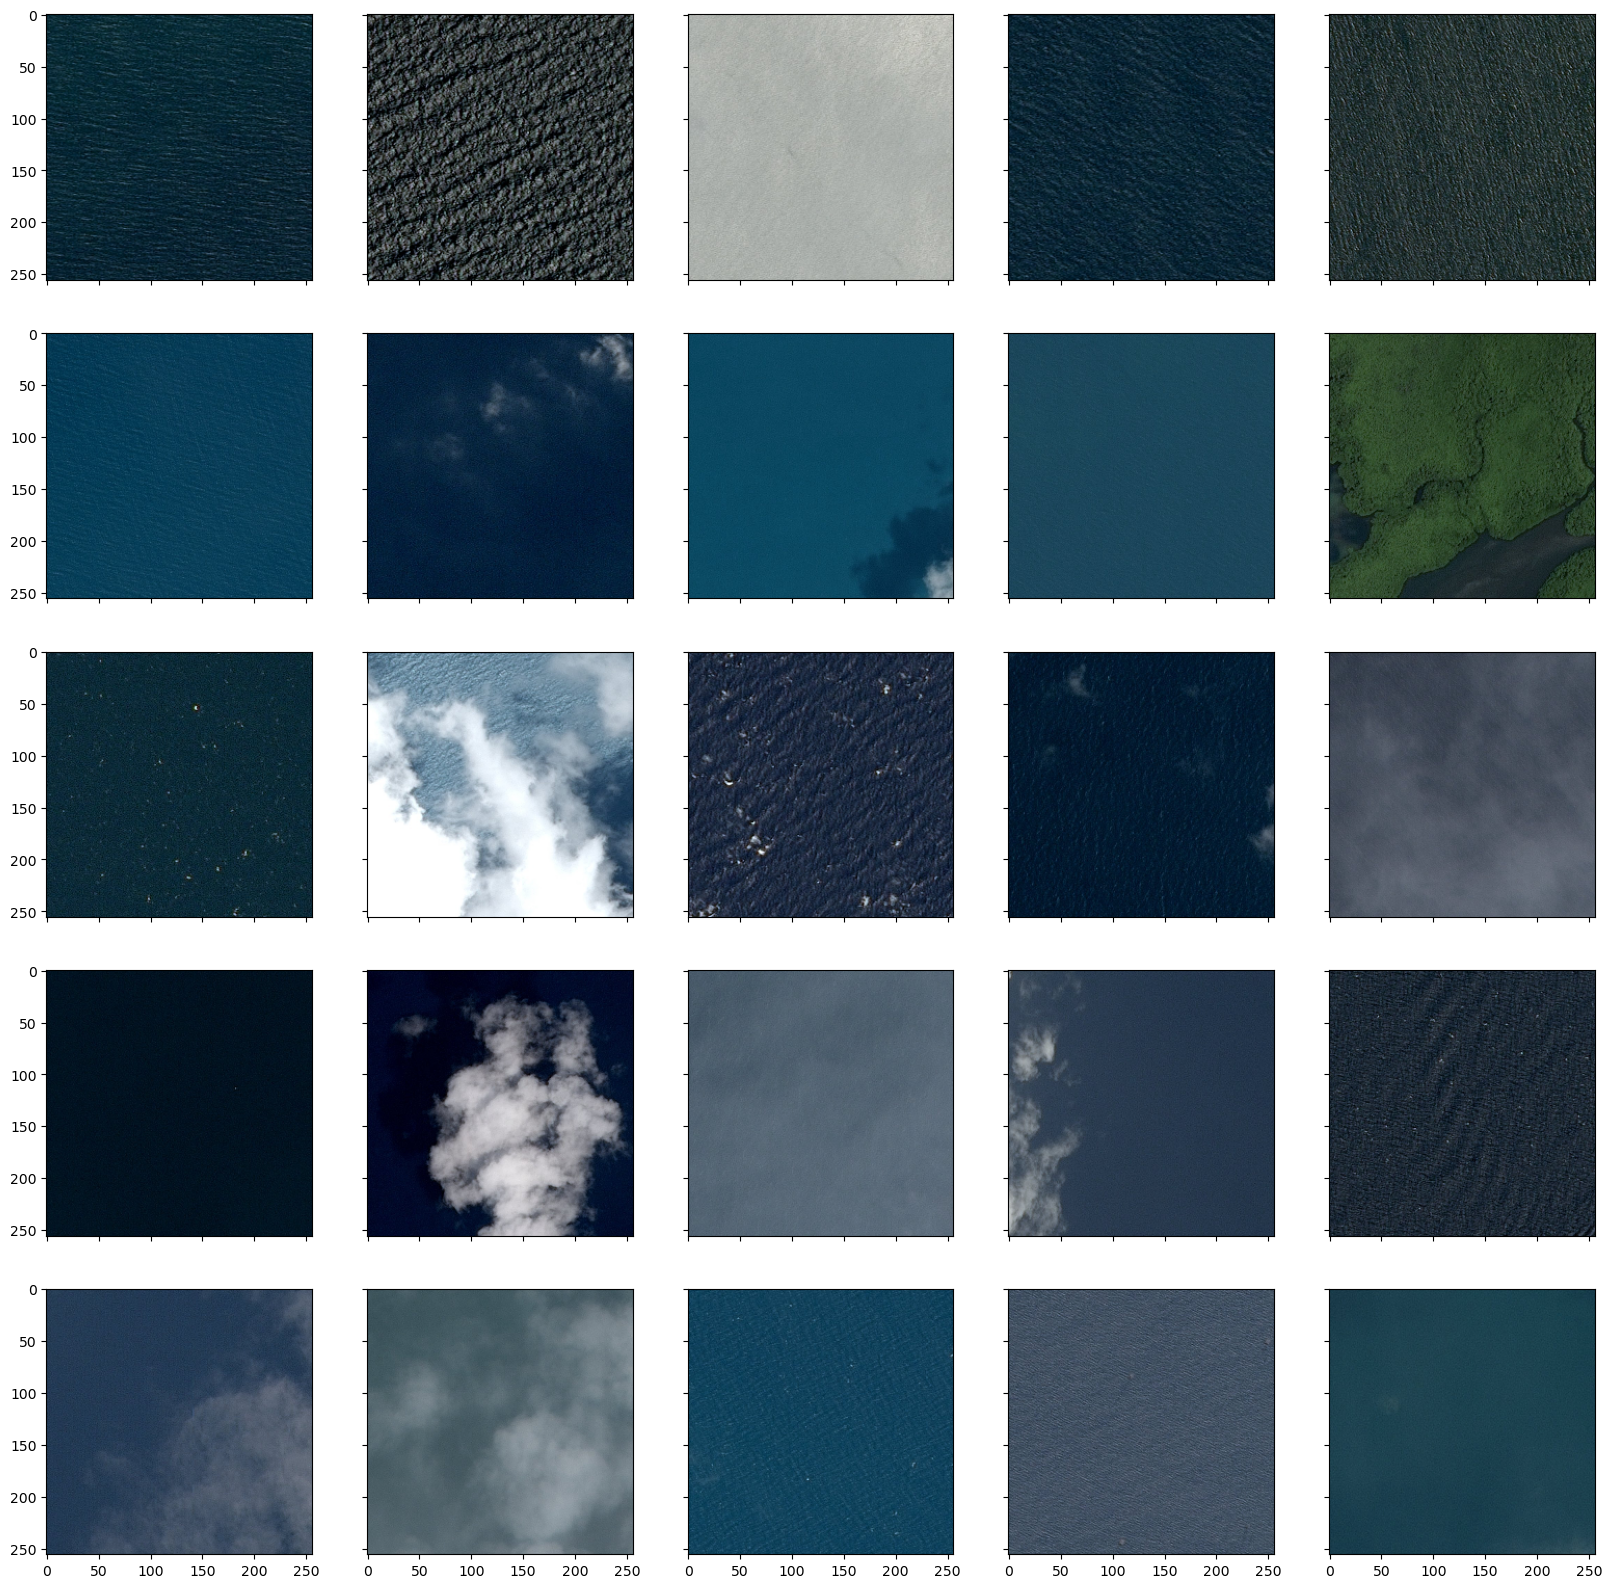

In [55]:
sample = seg_df[seg_df.EncodedPixels.isna()].sample(25)

fig, ax = plt.subplots(5, 5, sharex='col', sharey='row')
fig.set_size_inches(20, 20)

for i, imgid in enumerate(sample.ImageId):
    col = i % 5
    row = i // 5
    
    path = '../dataset_folder/{}'.format(imgid)
    img = load_img(path, target_size = (256,256))
    
    ax[row, col].imshow(img)

## As you can see, there are some interesting cases
* Some images contains ships that we can recognise 
* Some images contatins extrimaly small ships, only by the footprints on the water can we tell if it is there 
* There are lots of images without ships. They have clouds , sea , landscape and etc.

In [ ]:
# Count the number of ships on images
seg_df['ships'] = seg_df['EncodedPixels'].map(lambda c_row: 1 if isinstance(c_row, str) else 0)

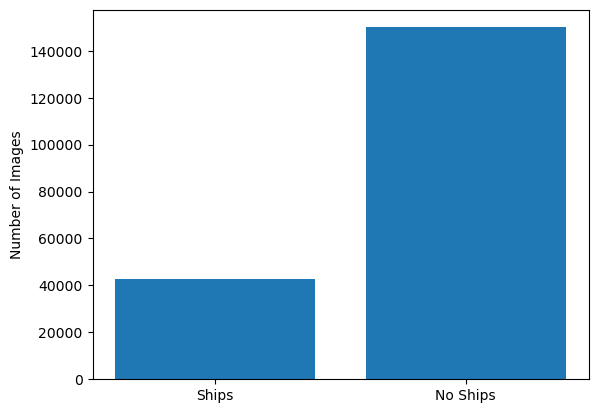

In [19]:
ships = seg_df[~seg_df.EncodedPixels.isna()].ImageId.unique()
noships = seg_df[seg_df.EncodedPixels.isna()].ImageId.unique()

plt.bar(['Ships', 'No Ships'], [len(ships), len(noships)]);
plt.ylabel('Number of Images');

## There are many images that don't have ships on them .

In [20]:
# add columns with label if the image has ship or not
unique_img_ids = seg_df.groupby('ImageId').agg({'ships': 'sum'}).reset_index()
unique_img_ids['has_ship'] = unique_img_ids['ships'].map(lambda x: 1.0 if x > 0 else 0.0)


In [21]:
unique_img_ids

ImageId  ships  has_ship
0       00003e153.jpg      0       0.0
1       0001124c7.jpg      0       0.0
2       000155de5.jpg      1       1.0
3       000194a2d.jpg      5       1.0
4       0001b1832.jpg      0       0.0
...               ...    ...       ...
192551  fffedbb6b.jpg      0       0.0
192552  ffff2aa57.jpg      0       0.0
192553  ffff6e525.jpg      0       0.0
192554  ffffc50b4.jpg      0       0.0
192555  ffffe97f3.jpg      0       0.0

[192556 rows x 3 columns]

In [23]:
ship_files = unique_img_ids[unique_img_ids.has_ship>0]

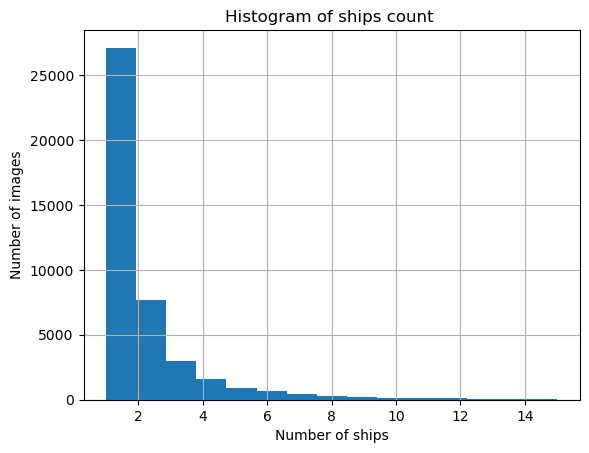

In [25]:
ship_files['ships'].hist(bins=ship_files['ships'].max())
plt.title("Histogram of ships count ")
plt.xlabel("Number of ships")
plt.ylabel("Number of images")
plt.show()

Most of images contains 1 ship

In [31]:
ship_files = unique_img_ids[unique_img_ids.has_ship>0].ImageId.values
empty_files = unique_img_ids[unique_img_ids.has_ship==0].ImageId.values


In [32]:
ship_files

array(['000155de5.jpg', '000194a2d.jpg', '00021ddc3.jpg', ...,
       'fffcb6464.jpg', 'fffd924fb.jpg', 'fffdd2377.jpg'], dtype=object)

In [42]:
empty_files


array(['00003e153.jpg', '0001124c7.jpg', '0001b1832.jpg', ...,
       'ffff6e525.jpg', 'ffffc50b4.jpg', 'ffffe97f3.jpg'], dtype=object)

In [75]:
def show_img(im, figsize=None, ax=None, alpha=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    image = load_img(im, target_size = (256,256)) 
    ax.imshow(np.array(image), alpha=alpha)
    ax.set_axis_off()
    return ax

In [76]:
path_to_masks = os.listdir(os.path.join("../mask_folder"))
full_path_to_images = ['../dataset_folder/' + i.split('_')[0] + '.jpg' for i in path_to_masks]
full_path_to_mask = ['../mask_folder/' + i for i in path_to_masks]

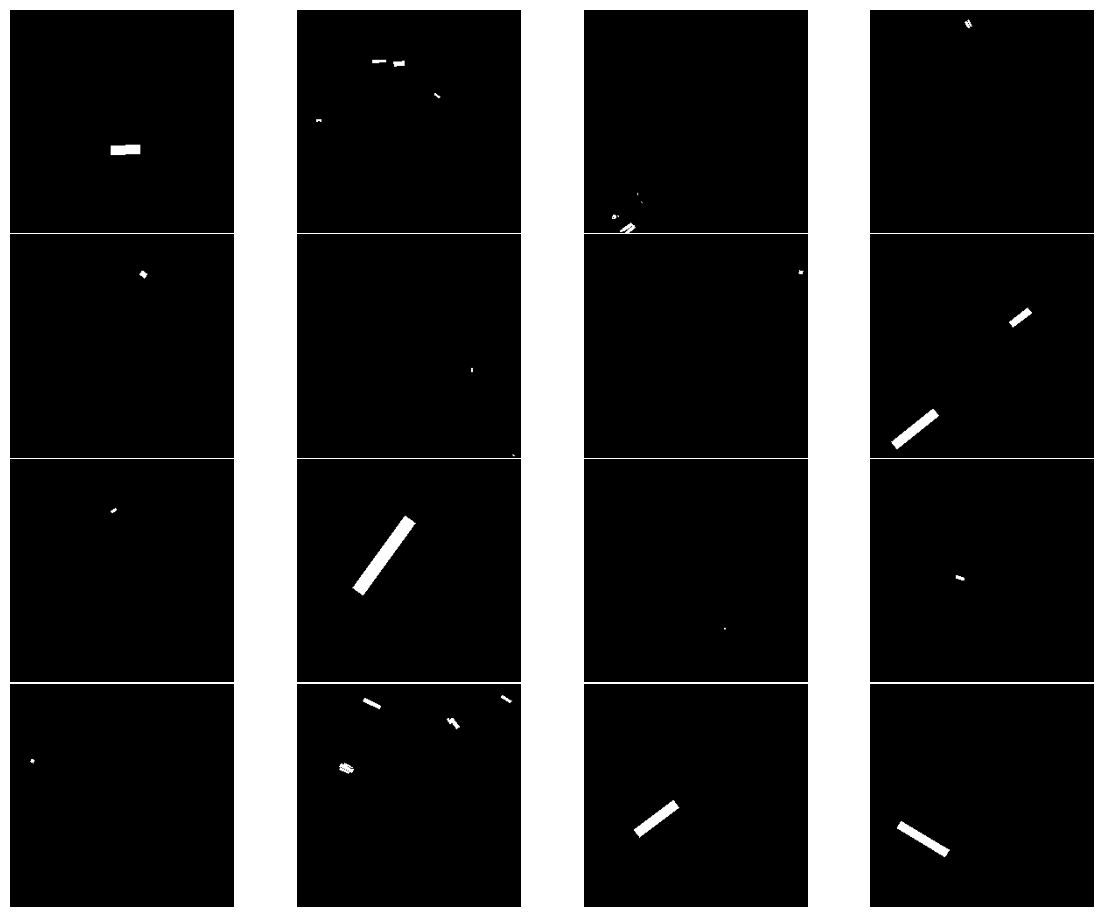

In [77]:
fig, axes = plt.subplots(4, 4, figsize=(12, 9))
for i, ax in enumerate(axes.flat):
    ax = show_img(full_path_to_mask[i], ax=ax)
    
plt.tight_layout(pad=0.1)